<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Create-our-dataset" data-toc-modified-id="Create-our-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Create our dataset</a></span></li><li><span><a href="#Fine-Tune-the-model" data-toc-modified-id="Fine-Tune-the-model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Fine Tune the model</a></span><ul class="toc-item"><li><span><a href="#Load-a-dataset-to-fine-tune-the-model" data-toc-modified-id="Load-a-dataset-to-fine-tune-the-model-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Load a dataset to fine tune the model</a></span></li><li><span><a href="#Prepare-the-data" data-toc-modified-id="Prepare-the-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Prepare the data</a></span></li><li><span><a href="#Tokenize-the-text" data-toc-modified-id="Tokenize-the-text-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Tokenize the text</a></span></li><li><span><a href="#Define-the-model" data-toc-modified-id="Define-the-model-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Define the model</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Fine-Tune-the-model" data-toc-modified-id="Fine-Tune-the-model-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Fine-Tune the model</a></span></li><li><span><a href="#Evaluate" data-toc-modified-id="Evaluate-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Evaluate</a></span></li><li><span><a href="#Save-the-model-(Just-in-case-I-need-it-later)" data-toc-modified-id="Save-the-model-(Just-in-case-I-need-it-later)-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Save the model (Just in case I need it later)</a></span></li></ul></li><li><span><a href="#Get-Olist-Reviews-Sentiment" data-toc-modified-id="Get-Olist-Reviews-Sentiment-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Get Olist Reviews Sentiment</a></span><ul class="toc-item"><li><span><a href="#Load-the-model" data-toc-modified-id="Load-the-model-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Load the model</a></span></li><li><span><a href="#Evaluate-the-reviews" data-toc-modified-id="Evaluate-the-reviews-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Evaluate the reviews</a></span></li></ul></li><li><span><a href="#Study-the-reviews" data-toc-modified-id="Study-the-reviews-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Study the reviews</a></span><ul class="toc-item"><li><span><a href="#Visualizations-of-reviews" data-toc-modified-id="Visualizations-of-reviews-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Visualizations of reviews</a></span></li><li><span><a href="#What-drives-reviews?" data-toc-modified-id="What-drives-reviews?-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>What drives reviews?</a></span><ul class="toc-item"><li><span><a href="#Visually" data-toc-modified-id="Visually-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Visually</a></span></li><li><span><a href="#Reading-of-the-outputs" data-toc-modified-id="Reading-of-the-outputs-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Reading of the outputs</a></span></li></ul></li></ul></li><li><span><a href="#Verify-our-intuitions" data-toc-modified-id="Verify-our-intuitions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Verify our intuitions</a></span><ul class="toc-item"><li><span><a href="#Orders-information" data-toc-modified-id="Orders-information-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Orders information</a></span></li><li><span><a href="#Verification" data-toc-modified-id="Verification-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Verification</a></span></li></ul></li></ul></div>

In [1]:
# Standard libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from sklearn.model_selection import train_test_split
import torch
from wordcloud import WordCloud
from datasets import Dataset
from nltk.corpus import stopwords

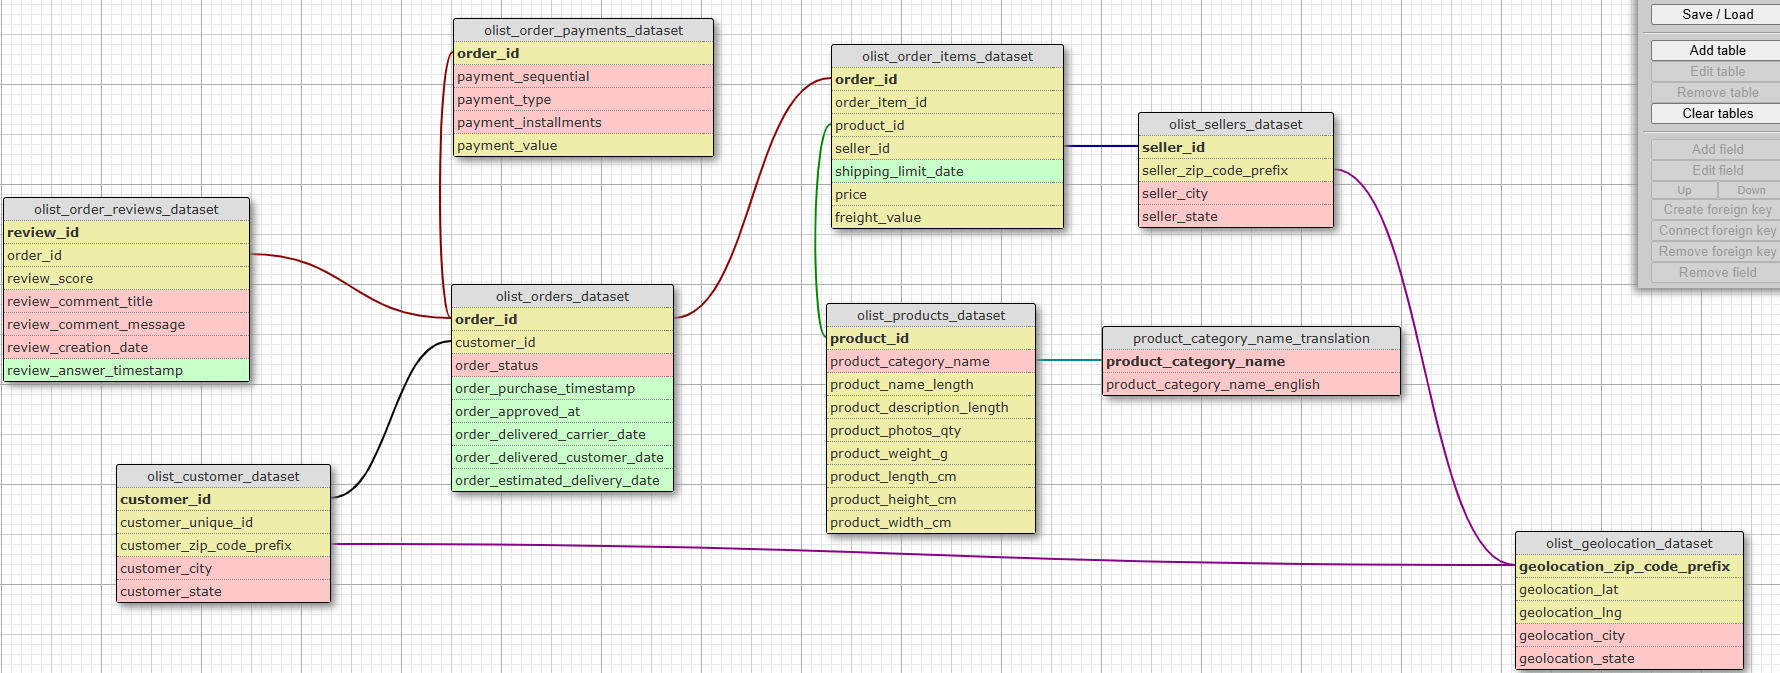

In [ ]:
Image('Image/olist_erd_details.png')

# Create our dataset

In [2]:
# Import the reviews data
reviews = pd.read_csv('data/olist_order_reviews_dataset.csv')
items = pd.read_csv('data/olist_order_items_dataset.csv')
products = pd.read_csv('data/olist_products_dataset.csv')
category_translation = pd.read_csv('data/product_category_name_translation.csv')

In [3]:
# Merge
data = reviews.merge(items, on= 'order_id',how= 'left') \
    .merge(products, on= 'product_id', how= 'left') \
    .merge(category_translation, on= 'product_category_name', how= 'left')

data.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,1.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,...,13.63,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,sports_leisure
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,2.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,...,13.63,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,sports_leisure
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,1.0,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,...,8.30,informatica_acessorios,47.0,493.0,1.0,245.0,19.0,14.0,14.0,computers_accessories
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,...,45.12,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,1.0,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,...,42.85,ferramentas_jardim,33.0,2188.0,2.0,7650.0,20.0,20.0,20.0,garden_tools


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113131 entries, 0 to 113130
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   review_id                      113131 non-null  object 
 1   order_id                       113131 non-null  object 
 2   review_score                   113131 non-null  int64  
 3   review_comment_title           13523 non-null   object 
 4   review_comment_message         48166 non-null   object 
 5   review_creation_date           113131 non-null  object 
 6   review_answer_timestamp        113131 non-null  object 
 7   order_item_id                  112372 non-null  float64
 8   product_id                     112372 non-null  object 
 9   seller_id                      112372 non-null  object 
 10  shipping_limit_date            112372 non-null  object 
 11  price                          112372 non-null  float64
 12  freight_value                 

In [5]:
data.isnull().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,99608
review_comment_message,64965
review_creation_date,0
review_answer_timestamp,0
order_item_id,759
product_id,759
seller_id,759


In [6]:
# drop useless columns
data=data.drop(columns=['review_comment_title','product_weight_g','product_length_cm', 'product_height_cm',
                        'product_width_cm','product_description_lenght','product_name_lenght'])

In [7]:
# transform timestamps in dates
data['review_creation_date']=pd.to_datetime(data['review_creation_date'])
data['review_answer_timestamp']=pd.to_datetime(data['review_answer_timestamp'])
data['shipping_limit_date']=pd.to_datetime(data['shipping_limit_date'])

In [8]:
data = data.dropna(subset=['review_comment_message'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48166 entries, 4 to 113130
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   review_id                      48166 non-null  object        
 1   order_id                       48166 non-null  object        
 2   review_score                   48166 non-null  int64         
 3   review_comment_message         48166 non-null  object        
 4   review_creation_date           48166 non-null  datetime64[ns]
 5   review_answer_timestamp        48166 non-null  datetime64[ns]
 6   order_item_id                  47642 non-null  float64       
 7   product_id                     47642 non-null  object        
 8   seller_id                      47642 non-null  object        
 9   shipping_limit_date            47642 non-null  datetime64[ns]
 10  price                          47642 non-null  float64       
 11  freight_value      

# Fine Tune the model

## Load a dataset to fine tune the model
I found a dataset on Kaggle called Repro that is about product reviews in brasilian portuguese!

## Prepare the data

In [4]:
Repro = pd.read_csv('data/RePro.csv')
Repro.head()

,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,review_text,overall_rating,...,reviewer_gender,reviewer_state,topics,polarity,ENTREGA,OUTROS,PRODUTO,CONDICOESDERECEBIMENTO,INADEQUADA,ANUNCIO
0,2018-05-14 13:57:59,a4380c38e7e73687066bf66329454b33e7749a8b49ad1a...,34398895,Kit Com 10 Cuecas Boxer de Cotton 4.0 - Polo M...,NaN,Moda,Masculino,"""O PRODUTO QUE NÃO ESTÁ AGRADANDO É A AMERICAN...","ESSE PRODUTO PODE ATÉ SER BOM, PORÉM, A AMERIC...",3,...,M,SP,"['ENTREGA', 'OUTROS']","['NEGATIVO', 'POSITIVO']",1,1,0,0,0,0
1,2018-01-18 12:02:42,fbf1d015682ddd45f97cedbc935fd42e42325498e68cd4...,132444050,Smartphone Motorola Moto G 5S Dual Chip Androi...,NaN,Celulares e Smartphones,Smartphone,"""compra sem susto""","Aparelho muito bom, confiável e com valor aqui...",4,...,M,ES,['PRODUTO'],['POSITIVO'],0,0,1,0,0,0
2,2018-04-18 12:06:14,6042f06b0d63fd46499b2f6eed116df96cc8f2649df8f3...,132710805,Impressora Hp Sprocket 100 Jato de Tinta,NaN,Câmeras e Filmadoras,Impressora e Papel Fotográfico,*,"As cores da impressão não são fiéis, O custo b...",3,...,F,MG,['PRODUTO'],['NEGATIVO'],0,0,1,0,0,0
3,2018-01-23 08:11:11,4871f745136a74808a49970db18d205fd66cb666acabb2...,119882282,Livro - It: A Coisa,NaN,Livros,Literatura Estrangeira,***,"A história é muito boa, porém o autor ""enrolou...",3,...,F,MG,['PRODUTO'],"['NEGATIVO', 'POSITIVO']",0,0,1,0,0,0
4,2018-02-17 11:19:38,6141e659c620ab597a5cda1b9150e180f7337434260eee...,23218825,Termometro Laser Digital Infravermelho Febre D...,NaN,Bebês,Higiene e Saúde,****,"Entrega rápida, produto muito bom Amei. Pratic...",4,...,F,SP,"['ENTREGA', 'PRODUTO']",['POSITIVO'],1,0,1,0,0,0


In [5]:
fine_tune_df = Repro[['review_text']].copy()

In [6]:
print(Repro['polarity'].value_counts())

polarity
['POSITIVO']                4127
['NEGATIVO']                3449
['NEGATIVO', 'POSITIVO']    2018
['NEUTRO']                   409
Name: count, dtype: int64


In [7]:
import ast

# Convert stringified lists into real lists
Repro['polarity_list'] = Repro['polarity'].apply(ast.literal_eval)

In [8]:
def label(polarities):
    if 'POSITIVO' in polarities and 'NEGATIVO' in polarities:
        return 'MIXED FEELING'
    elif 'POSITIVO' in polarities:
        return 'POSITIVE FEELING'
    elif 'NEGATIVO' in polarities:
        return 'NEGATIVE FEELING'
    else:
        return 'NEUTRAL'

fine_tune_df['label']= Repro['polarity'].apply(label)

In [9]:
fine_tune_df.head()


,review_text,label
0,"ESSE PRODUTO PODE ATÉ SER BOM, PORÉM, A AMERIC...",MIXED FEELING
1,"Aparelho muito bom, confiável e com valor aqui...",POSITIVE FEELING
2,"As cores da impressão não são fiéis, O custo b...",NEGATIVE FEELING
3,"A história é muito boa, porém o autor ""enrolou...",MIXED FEELING
4,"Entrega rápida, produto muito bom Amei. Pratic...",POSITIVE FEELING


In [10]:
fine_tune_df.describe()

,review_text,label
count,10003,10003
unique,10000,4
top,"No anuncio diz ""Molas ensacadas"". Na descrição...",POSITIVE FEELING
freq,2,4127


In [11]:
from sklearn.preprocessing import LabelEncoder

# Separate features (X) and target (y)
X = fine_tune_df['review_text']
y = fine_tune_df['label']

# Encode string labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

#Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

In [12]:
print(X_train.shape,X_test.shape)

(8002,) (2001,)


In [13]:
type(X_test)

pandas.core.series.Series

In [20]:
# HuggingFace dataset
train_dataset = Dataset.from_dict({
    "text": X_train.tolist(),
    "label": y_train.tolist()
})

test_dataset = Dataset.from_dict({
    "text": X_test.tolist(),
    "label": y_test.tolist()
})

In [21]:
print(label_encoder.classes_)

['MIXED FEELING' 'NEGATIVE FEELING' 'NEUTRAL' 'POSITIVE FEELING']


## Tokenize the text

In [22]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('ricardoz/BERTugues-base-portuguese-cased')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/227k [00:00<?, ?B/s]

In [23]:
def tokenize_function(example):
    return tokenizer(example["text"], padding="max_length", truncation=True, max_length=128)

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Set format for PyTorch
train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
test_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])


Map:   0%|          | 0/8002 [00:00<?, ? examples/s]

Map:   0%|          | 0/2001 [00:00<?, ? examples/s]

In [24]:
example = train_dataset.with_format("python")[0]
print(example)
print(tokenizer.decode(example["input_ids"], skip_special_tokens=True))

{'text': 'Só demorou para chegar, mas o celular é muito bom. Fiz uma excelente compra.', 'label': 0, 'input_ids': [2, 4571, 24055, 981, 4969, 16, 1207, 81, 10267, 71, 1581, 5384, 18, 4485, 979, 11211, 7026, 18, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Define the model

In [25]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(
    "ricardoz/BERTugues-base-portuguese-cased",
    num_labels=4,
)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at ricardoz/BERTugues-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Training

In [26]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    report_to=["none"],
    num_train_epochs=3
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
)

<ipython-input-26-6cd10565f3b5>:11: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


## Fine-Tune the model

In [27]:
import os
os.environ["WANDB_DISABLED"] = "true"
trainer.train()

Step,Training Loss
500,0.382300
1000,0.173900
1500,0.075500


TrainOutput(global_step=1503, training_loss=0.21018543758653277, metrics={'train_runtime': 147.4355, 'train_samples_per_second': 162.824, 'train_steps_per_second': 10.194, 'total_flos': 1579089354246144.0, 'train_loss': 0.21018543758653277, 'epoch': 3.0})

## Evaluate

In [28]:
metrics = trainer.evaluate()
print(metrics)

{'eval_loss': 0.41777706146240234, 'eval_runtime': 3.6943, 'eval_samples_per_second': 541.65, 'eval_steps_per_second': 34.107, 'epoch': 3.0}


## Save the model (Just in case I need it later)

In [29]:
model.save_pretrained("./Bertuguese")
tokenizer.save_pretrained("./Bertuguese")

('./Bertuguese/tokenizer_config.json',
 './Bertuguese/special_tokens_map.json',
 './Bertuguese/vocab.txt',
 './Bertuguese/added_tokens.json',
 './Bertuguese/tokenizer.json')

# Get Olist Reviews Sentiment
## Load the model

In [10]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_path = "./Bertuguese"

# Load Tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_path)

# Load model
model = AutoModelForSequenceClassification.from_pretrained(model_path)


## Evaluate the reviews

In [11]:
from tqdm import tqdm

# Define the mapping from class index to label
id2label = {
    0: "MIXED FEELING",
    1: "NEGATIVE FEELING",
    2: "NEUTRAL",
    3: "POSITIVE FEELING"
}

# Convert NaNs to empty strings (optional but recommended)
texts = data['review_comment_message'].fillna("").astype(str).tolist()

# Parameters
batch_size = 32
predicted_labels = []

# Process in batches to avoid memory crash
for i in tqdm(range(0, len(texts), batch_size), desc="Predicting"):
    batch_texts = texts[i:i+batch_size]

    # Tokenize batch
    inputs = tokenizer(batch_texts, return_tensors="pt", padding=True, truncation=True, max_length=128)

    with torch.no_grad():
        outputs = model(**inputs)
        preds = torch.argmax(outputs.logits, dim=1).tolist()

    # Convert indices to labels
    batch_labels = [id2label[i] for i in preds]
    predicted_labels.extend(batch_labels)

# Save to DataFrame
data['predicted_class'] = predicted_labels



Predicting: 100%|██████████| 1506/1506 [14:42<00:00,  1.71it/s]


In [12]:
data.to_csv('data_reviews.csv') # Save the dataframe to use later.

In [13]:
data

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_photos_qty,product_category_name_english,predicted_class
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,1.0,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,2017-04-13 17:55:19,179.99,42.85,ferramentas_jardim,2.0,garden_tools,POSITIVE FEELING
5,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,1.0,3880d25d502b15b1de6fddc42ad1d67a,989becdce12ebc39863c2bceab6f3ca1,2018-02-15 15:48:21,1199.00,134.25,esporte_lazer,5.0,sports_leisure,POSITIVE FEELING
13,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,aparelho eficiente. no site a marca do aparelh...,2018-05-22,2018-05-23 16:45:47,1.0,61a4100ccd6d9c4c808a1fd954ddb8ad,05ff92fedb5be47920fea08e501238b9,2018-05-17 10:31:31,586.56,26.69,eletroportateis,4.0,small_appliances,POSITIVE FEELING
20,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16,2018-02-20 10:52:22,1.0,acffe5d7cd56e6b564cf6841486644ff,db4350fd57ae30082dec7acbaacc17f9,2018-02-16 16:27:39,35.00,7.78,beleza_saude,1.0,health_beauty,MIXED FEELING
24,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,"Vendedor confiável, produto ok e entrega antes...",2018-05-23,2018-05-24 03:00:01,1.0,6871a3c157d6f51697e887f3c3598479,974cf2cb8f4b7add98709c30df02fe10,2018-05-24 18:31:29,89.99,13.07,informatica_acessorios,4.0,computers_accessories,POSITIVE FEELING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113112,98fffa80dc9acbde7388bef1600f3b15,d398e9c82363c12527f71801bf0e6100,4,para este produto recebi de acordo com a compr...,2017-11-29,2017-11-30 15:52:51,1.0,0bdd9a52d192d64770e33ae559512478,6560211a19b47992c3666cc44a7e94c0,2017-11-24 20:16:22,55.00,21.19,relogios_presentes,5.0,watches_gifts,POSITIVE FEELING
113115,df5fae90e85354241d5d64a8955b2b09,509b86c65fe4e2ad5b96408cfef9755e,5,Entregou dentro do prazo. O produto chegou em ...,2018-02-07,2018-02-19 19:47:23,1.0,b5e2d4b3fa2f9ecad4c1df951afcc8ce,432c37c9dfba871172ec162e20118b8c,2018-02-08 16:00:30,160.00,8.71,esporte_lazer,5.0,sports_leisure,POSITIVE FEELING
113122,a709d176f59bc3af77f4149c96bae357,d5cb12269711bd1eaf7eed8fd32a7c95,3,"O produto não foi enviado com NF, não existe v...",2018-05-19,2018-05-20 21:51:06,1.0,79da264732f717f10ebf5d102aa6c32a,562fc2f2c2863ab7e79a9e4388a58a14,2018-05-18 17:31:40,29.99,12.79,telefonia,5.0,telephony,NEGATIVE FEELING
113128,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43,1.0,8ba0118a487ec8671aed57e5ef846574,17ca9b9e9b9ef8fdb529001b49ebb50f,2018-03-22 10:08:04,215.97,15.59,papelaria,3.0,stationery,POSITIVE FEELING


# Study the reviews

In [30]:
data = pd.read_csv('data/data_reviews.csv')

## Visualizations of reviews

Our model produced 4 feeling categories:
 - Positive feelings: Reviews showing positive feelings
 - Negative feelings: Reviews showing negative feelings
 - Mixed feelings: Reviews showing BOTh positive and negative feelings
 - Neutral: reviews expressing no feelings.

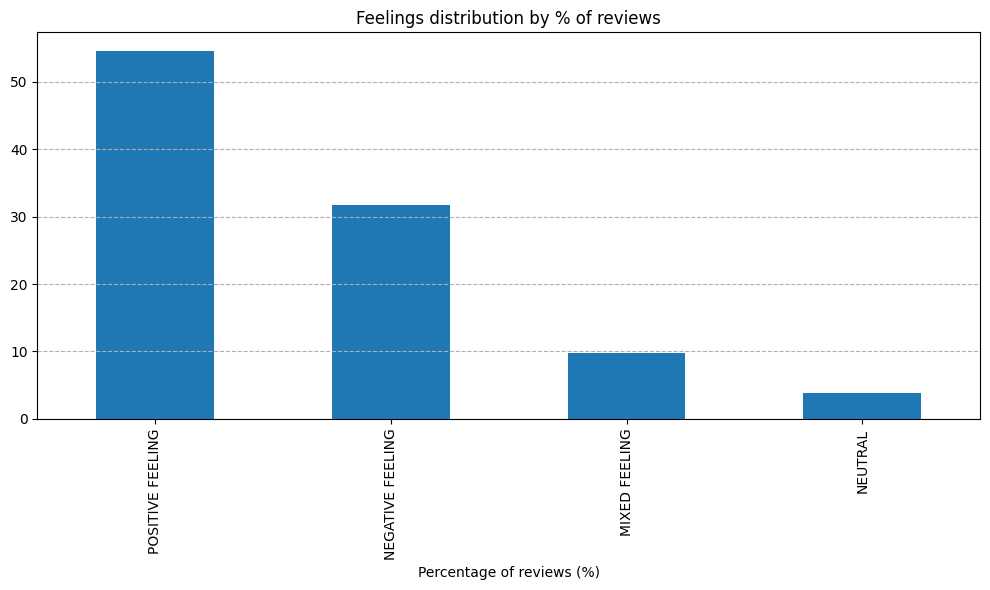

In [3]:
reviews_distribution =  data['predicted_class'].value_counts(normalize = True) * 100

plt.figure(figsize = (10,6))
reviews_distribution.plot(kind = 'bar')
plt.xlabel('Percentage of reviews (%)')
plt.title('Feelings distribution by % of reviews')
plt.grid(axis = 'y', linestyle = '--')
plt.tight_layout()
plt.show()

We can observe that over 50 % of reviews are positive, but that over 30 % of them are negative! In addition, 10 % expressed both positive and negative feelings.
## What drives reviews?
### Visually

In [4]:
pos_df = data[data['predicted_class']=='POSITIVE FEELING']['review_comment_message']
neg_df = data[data['predicted_class']=='NEGATIVE FEELING']['review_comment_message']
print(pos_df.shape,'\n',neg_df.shape)

(26283,) 
 (15304,)


In [5]:
STOP_WORDS = set(stopwords.words('portuguese')) | {'produto', 'pois', 'produtos'}

<function matplotlib.pyplot.show(close=None, block=None)>

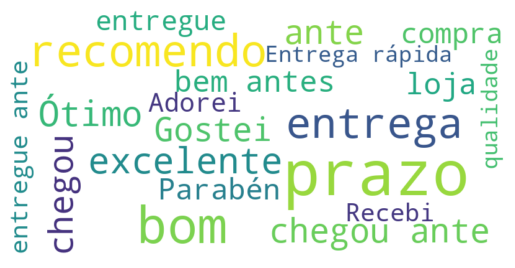

In [6]:
# Combine all the text into one string
text = ' '.join(pos_df.astype(str))

# Create and generate a word cloud image:
pos_wordcloud= WordCloud(width=800, height=400, max_font_size=100, min_font_size=10, 
                     background_color='white', max_words=20, stopwords=STOP_WORDS).generate(text)

# Get word frequencies (dictionary: word -> frequency)
pos_word_freq = pos_wordcloud.words_

plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
plt.show

In [7]:
# Sort words by frequency (as a string)
pos_words_sorted = sorted(pos_word_freq.items(), key=lambda x: x[1], reverse=True)

# Convert to string for display
pos_word_string = ', '.join([f"{word} ({freq:.3f})" for word, freq in pos_words_sorted])
print(pos_word_string)

prazo (1.000), bom (0.629), recomendo (0.481), entrega (0.437), excelente (0.308), Ótimo (0.285), chegou ante (0.263), chegou (0.260), ante (0.255), Gostei (0.244), loja (0.202), bem antes (0.200), Parabén (0.194), compra (0.184), entregue (0.172), Adorei (0.159), Recebi (0.145), entregue ante (0.142), Entrega rápida (0.138), qualidade (0.138)


**TRANSLATION** <br>
<br>
deadline (1.000), good (0.629), I recommend (0.485), delivery (0.437), excellent (0.308), Great (0.285), arrived before (0.263), arrived (0.260), before (0.255), I liked it (0.244), store (0.202), well before (0.200), Congratulations (0.194), purchase (0.187), delivered (0.165), I loved it (0.159), I received it (0.145), delivered before (0.142), Fast delivery (0.138), quality (0.138)

<function matplotlib.pyplot.show(close=None, block=None)>

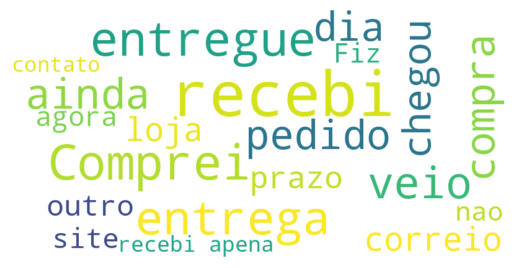

In [8]:
text = ' '.join(neg_df.astype(str))

neg_wordcloud= WordCloud(width=800, height=400, max_font_size=100, min_font_size=10, 
                     background_color='white', max_words=20, stopwords=STOP_WORDS).generate(text)


neg_word_freq = neg_wordcloud.words_

plt.imshow(neg_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
plt.show

In [9]:
neg_words_sorted = sorted(neg_word_freq.items(), key=lambda x: x[1], reverse=True)

neg_word_string = ', '.join([f"{word} ({freq:.3f})" for word, freq in neg_words_sorted])
print(neg_word_string)

recebi (1.000), Comprei (0.552), entregue (0.531), entrega (0.514), veio (0.445), ainda (0.406), compra (0.391), pedido (0.384), dia (0.376), chegou (0.358), correio (0.252), loja (0.243), prazo (0.227), outro (0.204), site (0.189), agora (0.181), nao (0.174), Fiz (0.171), recebi apena (0.164), contato (0.157)


**TRANSLATION** <br>
<br>
received (1,000), bought (0.552), delivered (0.531), delivery (0.514), came (0.445), still (0.406), purchase (0.391), order (0.384), day (0.376), arrived (0.358), mail (0.252), store (0.243), deadline (0.227), other (0.204), website (0.189), now (0.181), not (0.174), did (0.171), just received (0.164), contact (0.157)

### Reading of the outputs

*POSITIVE REVIEWS*<br>
From the frequent words in positive reviews, it's clear that customers were often pleased with early deliveries (chegou ante, entregue ante, Entrega rápida) and product quality (bom, excelente, qualidade). Expressions of satisfaction like Adorei, Gostei, and recomendo reinforce this positive sentiment.<br>
<br>
*NEGATIVE REVIEWS*<br>
In contrast, negative reviews also focus heavily on the delivery experience—but in a negative light. Words such as ainda, prazo, entrega, and recebi apenas indicate delays, unmet delivery expectations, or incomplete orders. Additionally, terms like contato and nao suggest communication issues or lack of responsiveness from the seller or platform.

# Verify our intuitions

## Orders information
We first need to gather the orders delivery information

In [31]:
data = data.drop(columns='Unnamed: 0')
data.head()

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_photos_qty,product_category_name_english,predicted_class
0,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,1.0,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,2017-04-13 17:55:19,179.99,42.85,ferramentas_jardim,2.0,garden_tools,POSITIVE FEELING
1,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,1.0,3880d25d502b15b1de6fddc42ad1d67a,989becdce12ebc39863c2bceab6f3ca1,2018-02-15 15:48:21,1199.00,134.25,esporte_lazer,5.0,sports_leisure,POSITIVE FEELING
2,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47,1.0,61a4100ccd6d9c4c808a1fd954ddb8ad,05ff92fedb5be47920fea08e501238b9,2018-05-17 10:31:31,586.56,26.69,eletroportateis,4.0,small_appliances,POSITIVE FEELING
3,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16 00:00:00,2018-02-20 10:52:22,1.0,acffe5d7cd56e6b564cf6841486644ff,db4350fd57ae30082dec7acbaacc17f9,2018-02-16 16:27:39,35.00,7.78,beleza_saude,1.0,health_beauty,MIXED FEELING
4,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01,1.0,6871a3c157d6f51697e887f3c3598479,974cf2cb8f4b7add98709c30df02fe10,2018-05-24 18:31:29,89.99,13.07,informatica_acessorios,4.0,computers_accessories,POSITIVE FEELING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48161,98fffa80dc9acbde7388bef1600f3b15,d398e9c82363c12527f71801bf0e6100,4,para este produto recebi de acordo com a compr...,2017-11-29 00:00:00,2017-11-30 15:52:51,1.0,0bdd9a52d192d64770e33ae559512478,6560211a19b47992c3666cc44a7e94c0,2017-11-24 20:16:22,55.00,21.19,relogios_presentes,5.0,watches_gifts,POSITIVE FEELING
48162,df5fae90e85354241d5d64a8955b2b09,509b86c65fe4e2ad5b96408cfef9755e,5,Entregou dentro do prazo. O produto chegou em ...,2018-02-07 00:00:00,2018-02-19 19:47:23,1.0,b5e2d4b3fa2f9ecad4c1df951afcc8ce,432c37c9dfba871172ec162e20118b8c,2018-02-08 16:00:30,160.00,8.71,esporte_lazer,5.0,sports_leisure,POSITIVE FEELING
48163,a709d176f59bc3af77f4149c96bae357,d5cb12269711bd1eaf7eed8fd32a7c95,3,"O produto não foi enviado com NF, não existe v...",2018-05-19 00:00:00,2018-05-20 21:51:06,1.0,79da264732f717f10ebf5d102aa6c32a,562fc2f2c2863ab7e79a9e4388a58a14,2018-05-18 17:31:40,29.99,12.79,telefonia,5.0,telephony,NEGATIVE FEELING
48164,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,1.0,8ba0118a487ec8671aed57e5ef846574,17ca9b9e9b9ef8fdb529001b49ebb50f,2018-03-22 10:08:04,215.97,15.59,papelaria,3.0,stationery,POSITIVE FEELING


In [32]:
order_df = pd.read_csv('data/olist_orders_dataset.csv')
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


We need to transform the time related columns in **Datetime** Dtype 

In [33]:
order_df['order_purchase_timestamp'] = pd.to_datetime(order_df['order_purchase_timestamp'])
order_df['order_approved_at'] = pd.to_datetime(order_df['order_approved_at'])
order_df['order_delivered_carrier_date'] = pd.to_datetime(order_df['order_delivered_carrier_date'])
order_df['order_delivered_customer_date'] = pd.to_datetime(order_df['order_delivered_customer_date'])
order_df['order_estimated_delivery_date'] = pd.to_datetime(order_df['order_estimated_delivery_date'])
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [34]:
data = data.merge(order_df, on = 'order_id',how = 'inner')
data.shape

(48166, 23)

In [35]:
data['review_creation_date'] = pd.to_datetime(data['review_creation_date'])
data['review_answer_timestamp'] = pd.to_datetime(data['review_answer_timestamp'])

In [36]:
pos_df = data[data['predicted_class'] == 'POSITIVE FEELING'].copy()
neg_df = data[data['predicted_class'] == 'NEGATIVE FEELING'].copy()

## Verification

In [52]:
# Calculate time deltas
pos_df.loc[:, 'delivery_delay'] = (pos_df['order_delivered_customer_date'] - pos_df['order_estimated_delivery_date']).dt.days
pos_df.loc[:, 'seller_reactivity'] = (pos_df['order_approved_at'] - pos_df['order_purchase_timestamp']).dt.days
pos_df.loc[:, 'seller_answer_reactivity'] = abs((pos_df['review_creation_date'] - pos_df['review_answer_timestamp']).dt.days)

neg_df.loc[:, 'delivery_delay'] = (neg_df['order_delivered_customer_date'] - neg_df['order_estimated_delivery_date']).dt.days
neg_df.loc[:, 'seller_reactivity'] = (neg_df['order_approved_at'] - neg_df['order_purchase_timestamp']).dt.days
neg_df.loc[:, 'seller_answer_reactivity'] = abs((neg_df['review_creation_date'] - neg_df['review_answer_timestamp']).dt.days)

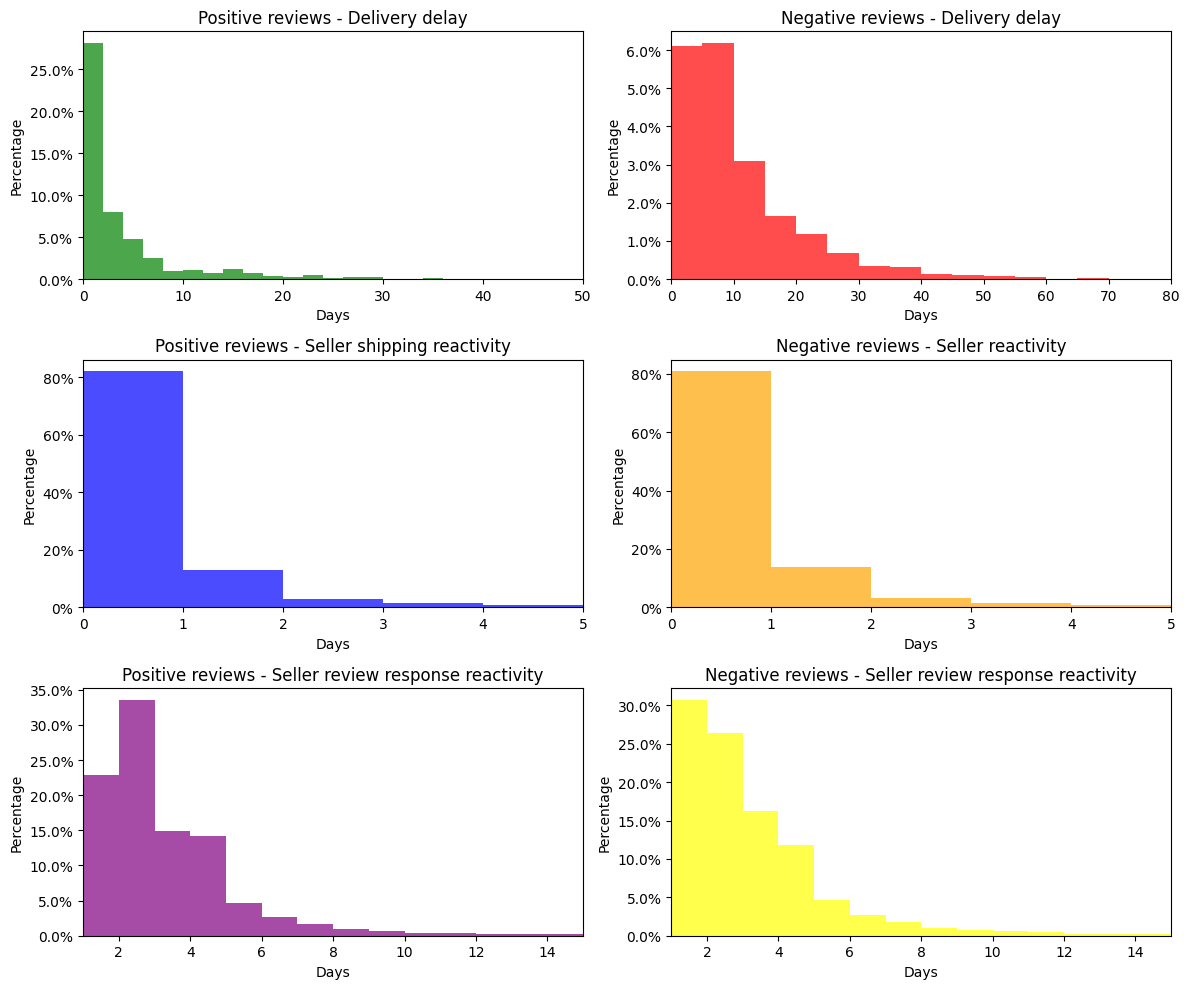

In [55]:
import matplotlib.ticker as mtick

fig, axs = plt.subplots(3, 2, figsize=(12, 10))

# Delivery pace - Positive reviews
axs[0, 0].hist(pos_df['delivery_delay'].dropna(), bins=range(0, 41, 2), color='green', alpha=0.7, density=True)
axs[0, 0].set_title('Positive reviews - Delivery delay')
axs[0, 0].set_xlabel('Days')
axs[0, 0].set_ylabel('Percentage')
axs[0, 0].set_xlim(0, 50)
axs[0, 0].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

# Seller shipping reactivity - Positive reviews
axs[1, 0].hist(pos_df['seller_reactivity'].dropna(), bins=range(0, 6), color='blue', alpha=0.7, density=True)
axs[1, 0].set_title('Positive reviews - Seller shipping reactivity')
axs[1, 0].set_xlabel('Days')
axs[1, 0].set_ylabel('Percentage')
axs[1, 0].set_xlim(0, 5)
axs[1, 0].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

# Seller answer to review reactivity - Positive reviews
seller_answer_data_pos = pos_df['seller_answer_reactivity'].dropna()
axs[2, 0].hist(seller_answer_data_pos, bins=range(int(seller_answer_data_pos.min()), int(seller_answer_data_pos.max()) + 2), color='purple', alpha=0.7, density=True)
axs[2, 0].set_title('Positive reviews - Seller review response reactivity')
axs[2, 0].set_xlabel('Days')
axs[2, 0].set_ylabel('Percentage')
axs[2, 0].set_xlim(1, 15)
axs[2, 0].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

# Delivery pace - Negative reviews
axs[0, 1].hist(neg_df['delivery_delay'].dropna(), bins=range(0, 81, 5), color='red', alpha=0.7, density=True)
axs[0, 1].set_title('Negative reviews - Delivery delay')
axs[0, 1].set_xlabel('Days')
axs[0, 1].set_ylabel('Percentage')
axs[0, 1].set_xlim(0, 80)
axs[0, 1].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

# Seller ship command reactivity - Negative reviews
axs[1, 1].hist(neg_df['seller_reactivity'].dropna(), bins=range(0, 6), color='orange', alpha=0.7, density=True)
axs[1, 1].set_title('Negative reviews - Seller reactivity')
axs[1, 1].set_xlabel('Days')
axs[1, 1].set_ylabel('Percentage')
axs[1, 1].set_xlim(0, 5)
axs[1, 1].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

# Seller answer to review reactivity - Negative reviews
seller_answer_data_neg = neg_df['seller_answer_reactivity'].dropna()
axs[2, 1].hist(seller_answer_data_neg, bins=range(int(seller_answer_data_neg.min()), int(seller_answer_data_neg.max()) + 2), color='yellow', alpha=0.7, density=True)
axs[2, 1].set_title('Negative reviews - Seller review response reactivity')
axs[2, 1].set_xlabel('Days')
axs[2, 1].set_ylabel('Percentage')
axs[2, 1].set_xlim(1, 15)
axs[2, 1].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

plt.tight_layout()
plt.show()

**What the graphs say**:<br><br>
*Positive Reviews*:<br>
**Delivery Delay**: Mostly under 10 days, peaking close to 0 days → delivery was very fast.
<br>
**Seller Shipping Reactivity**: Nearly all under 1 day → immediate response from seller after order.
<br>
**Seller Review Response Reactivity**: Mostly between 2–5 days → decent but not instant review responses.
<br>
*This confirms a positive customer experience, mostly driven by fast delivery and prompt seller action.*
<br><br>
*Negative Reviews*:<br>
**Delivery Delay**: Spread across 10–40+ days → very late deliveries.
<br>
**Seller Shipping Reactivity**: Still mostly under 1 day → surprisingly fast processing even in negative reviews.
<br>
**Seller Review Response Reactivity**: Still centered around 2–5 days → not dramatically worse than positive ones.
<br>
**The seller reactivity remains fast even in negative reviews, suggesting that the main pain point is delivery, not seller reactivity.**
<br><br>
**What the word clouds / frequencies say**:<br><br>
*Positive*:<br>
Words like chegou ante, entrega, Entrega rápida = praise for delivery speed.<br>

bom, excelente, recomendo = praise for product and experience.<br>
<br><br>
*Negative*:<br>
Words like entrega, ainda, recebi apenas, contato, prazo, pedido = complaints related to not receiving or delayed items.<br>
<br>
contato, site, nao = lack of communication or frustration.
<br><br>
**So why the mismatch?**
We expected negative reviews to show worse seller reactivity, but:
<br>
Graphs show seller reactivity is quick even in negative reviews.
<br>
Words in negative reviews suggest frustration with the delivery outcome, not the speed of seller processing.
<br><br>
**Possible Explanation**:<br>
The seller might ship the order quickly (reactivity is fast), but:
<br>
Logistics partners might cause delays or losses.
<br>
Customers blame the seller anyway, expressing it as: “I didn’t receive my item”, “still waiting”, etc.
<br>
Hence, terms like contato, recebi apenas, ainda appear.